In [2]:
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
## local imports
from  CommonFunctions import *
from Constants import *


In [7]:

print("looking for cached file in [{0}]".format(STABILITY_DATAFRAME))
if path.exists(STABILITY_DATAFRAME):
    with open(STABILITY_DATAFRAME, 'rb') as f:
      df_stability =  pickle.load(f)
    print('loaded stability dataframe list [{0}] from cache'.format(STABILITY_DATAFRAME))
else:
    print("cached file NOT found -- execute computeTrajectoryAssociations() again from [LDA_topics_generator_pipeline]")
    exit()

looking for cached file in [C:/Users/c2057924/Newcastle University/data/generated/stability.pkl]
loaded stability dataframe list [C:/Users/c2057924/Newcastle University/data/generated/stability.pkl] from cache


In [8]:
df_stability

,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]"
1,1000062,"[spondylosis, obesity, urine_incont, female_ge...",True,0.26,3,1.19,-116.88,"[1.16, 1.54, 1.70, 2.60]"
2,1000077,"[cystic_renal, hypertension, enthesopathy, all...",True,0.43,1,6.92,62.76,"[3.95, 8.21, 0.79, 2.05]"
3,1000124,"[menorrhagia, intervert_disc, depression, hype...",False,0.06,NaN,0.84,73.63,"[2.72, 1.81, 2.48, 1.00]"
4,1000146,"[OA, enthesopathy, CCD, pri_skin]",True,0.66,1,2.31,73.15,"[1.09, 2.35, 0.42, 0.15]"
...,...,...,...,...,...,...,...,...
167827,6024736,"[irritable_bowel_syndrome, anxiety_phobia, dep...",False,-0.08,NaN,0.80,105.40,"[4.33, 0.95, 4.54, 0.18]"
167828,6024745,"[anxiety_phobia, depression, dementia, cerebro...",True,0.29,1,1.53,126.94,"[0.44, 1.71, 1.36, 0.49]"
167829,6024791,"[CCD, iron_deficiency_anaemia, oth_anaemia, vi...",True,0.33,0,2.66,6.19,"[2.65, 1.82, 0.01, 1.53]"
167830,6024800,"[anxiety_phobia, allergic_rhinitis, obesity, G...",True,0.15,2,1.48,-146.08,"[1.95, 0.52, 3.19, 1.34]"


In [129]:
df_gb = df_stability.groupby(['stable']).size()
df_gb

stable
False     38392
True     129440
dtype: int64

In [9]:
df_stability_stable = df_stability[df_stability['stable'] == True]

df_stability_stable_sorted = df_stability_stable.sort_values(by='dominantCluster')
df_stability_stable_sorted

,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]"
94488,3825093,"[vitiligo, asthma, enthesopathy, type_2_diabet...",True,0.46,0,3.96,-45.69,"[3.17, 0.29, 0.41, 3.13]"
94487,3825019,"[dermatitis, venous_lymphatic, enthesopathy, m...",True,0.19,0,2.18,26.25,"[2.99, 1.46, 1.04, 0.50]"
94486,3824994,"[anxiety_phobia, depression, urine_incont, tin...",True,0.11,0,2.04,-11.49,"[5.42, 1.88, 3.42, 2.29]"
94485,3824953,"[allergic_rhinitis, sinusitis, enthesopathy, d...",True,0.11,0,3.12,24.76,"[5.05, 2.51, 2.22, 1.21]"
...,...,...,...,...,...,...,...,...
124513,4724345,"[diverticular, type_2_diabetes, diab_neuro, en...",True,0.33,3,4.19,-50.36,"[3.36, 2.36, 0.69, 5.58]"
22704,1680420,"[spondylosis, type_2_diabetes, unspecified_rar...",True,0.14,3,2.05,-28.28,"[2.65, 3.27, 0.85, 4.24]"
22702,1680359,"[enthesopathy, migraine, OA, unspecified_rare_...",True,0.21,3,3.97,-38.73,"[4.78, 5.52, 1.68, 8.01]"
124328,4719154,"[obesity, seb_derm, GORD, psoriasis, hypertens...",True,0.15,3,2.03,-29.28,"[3.03, 2.36, 1.26, 3.35]"


# RAW_MLTC

In [10]:
df_raw = pd.read_csv(RAW_MLTC_SEQUENCES, sep='\t')
df_raw

,patient_id,event_date,read_2,LTC,LTC_abbrev,sex,YOB,age_at_event,count_per_LTC,count_distinct_LTC
0,1000014,2004-06-09,N20..,Polymyalgia Rheumatica,PMR,F,1946,58,1,1
1,1000014,2011-07-12,F451.,Glaucoma,glaucoma,F,1946,65,1,2
2,1000059,1995-10-27,N05z5,Osteoarthritis (excl spine),OA,M,1942,53,1,1
3,1000059,1998-09-01,N05..,Osteoarthritis (excl spine),OA,M,1942,56,2,1
4,1000059,1999-05-24,N05z5,Osteoarthritis (excl spine),OA,M,1942,57,3,1
...,...,...,...,...,...,...,...,...,...,...
2851238,6024869,2005-05-03,M153.,Rosacea,rosacea,M,1942,63,2,1
2851239,6024869,2008-05-13,M153.,Rosacea,rosacea,M,1942,66,3,1
2851240,6024869,2012-01-30,G20z.,Hypertension,hypertension,M,1942,70,1,2
2851241,6024869,2013-03-13,21261,Hypertension,hypertension,M,1942,71,2,2


In [11]:
merged_df = pd.merge(df_stability, df_raw, left_on='patientID', right_on='patient_id')

In [12]:
filtered_merged_df = merged_df[merged_df['stable'] == True]
sorted_merged_df = filtered_merged_df.sort_values(by='dominantCluster')
sorted_merged_df

,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector,patient_id,event_date,read_2,LTC,LTC_abbrev,sex,YOB,age_at_event,count_per_LTC,count_distinct_LTC
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]",1000059,1995-10-27,N05z5,Osteoarthritis (excl spine),OA,M,1942,53,1,1
1521249,3814380,"[thyroid, asthma, vitb12_deficiency]",True,0.72,0,2.19,-29.72,"[1.91, 0.00, 0.00, 1.09]",3814380,2014-08-08,66E5.,"Vitamin B12 deficiency, with and without anaemia",vitb12_deficiency,F,1962,52,34,3
1521248,3814380,"[thyroid, asthma, vitb12_deficiency]",True,0.72,0,2.19,-29.72,"[1.91, 0.00, 0.00, 1.09]",3814380,2014-06-13,66E5.,"Vitamin B12 deficiency, with and without anaemia",vitb12_deficiency,F,1962,52,33,3
1521247,3814380,"[thyroid, asthma, vitb12_deficiency]",True,0.72,0,2.19,-29.72,"[1.91, 0.00, 0.00, 1.09]",3814380,2014-04-17,66E5.,"Vitamin B12 deficiency, with and without anaemia",vitb12_deficiency,F,1962,52,32,3
1521246,3814380,"[thyroid, asthma, vitb12_deficiency]",True,0.72,0,2.19,-29.72,"[1.91, 0.00, 0.00, 1.09]",3814380,2014-02-22,66E5.,"Vitamin B12 deficiency, with and without anaemia",vitb12_deficiency,F,1962,52,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124004,1226758,"[cin_cervical, pri_cervical, cholelithiasis, a...",True,0.15,3,2.63,-153.57,"[1.79, 3.45, 4.15, 4.62]",1226758,2012-03-06,G20..,Hypertension,hypertension,F,1948,64,6,8
1686037,4114376,"[unspecified_rare_diabetes, type_2_diabetes, d...",True,0.31,3,3.82,-53.87,"[2.35, 1.23, 0.10, 4.32]",4114376,2008-04-22,662K0,Coronary heart disease,CHD,M,1956,52,5,5
1686038,4114376,"[unspecified_rare_diabetes, type_2_diabetes, d...",True,0.31,3,3.82,-53.87,"[2.35, 1.23, 0.10, 4.32]",4114376,2008-10-16,662K0,Coronary heart disease,CHD,M,1956,52,6,5
124014,1226758,"[cin_cervical, pri_cervical, cholelithiasis, a...",True,0.15,3,2.63,-153.57,"[1.79, 3.45, 4.15, 4.62]",1226758,2013-03-22,1Z1F.,Chronic Kidney Disease,CKD,F,1948,65,1,9


# S_A


In [196]:
grouped_df = df_stability_stable_sorted.groupby('dominantCluster').apply(lambda x: x.sort_values('lastR', ascending=False).head(20))
grouped_df


patientID  \
dominantCluster                    
0               112940   4383088   
                44517    2330677   
                73044    3183602   
                31810    1950612   
                73770    3205175   
...                          ...   
3               45003    2346146   
                71782    3146181   
                80954    3418564   
                159219   5765006   
                56844    2702781   

                                                               conditions  \
dominantCluster                                                             
0               112940  [vitb12_deficiency, iron_deficiency_anaemia, o...   
                44517   [venous_thromb, depression, rosacea, OA, liche...   
                73044   [dermatitis, CHD, asthma, seb_derm, glaucoma, ...   
                31810   [psoriasis, anxiety_phobia, depression, OA, de...   
                73770   [venous_thromb, pri_skin, pri_coloretal_anus, ...   
...                                                                   ...   
3               45003   [type_2_diabetes, hidradenitis, hypertension, ...   
                71782   [obesity, urolithiasis, hypertension, type_2_d...   
                80954   [type_2_diabetes, obesity, hypertension, unspe...   
                159219  [dysmenorrhoea, unspecified_rare_diabetes, typ...   
                56844   [type_1_diabetes, unspecified_rare_diabetes, o...   

                       stable trend dominantCluster lastR lastTheta  \
dominantCluster                                                       
0               112940   True  0.45               0  9.77     -6.65   
                44517    True  0.34               0  9.76     20.80   
                73044    True  0.39               0  9.69     27.17   
                31810    True  0.43               0  9.59     16.60   
                73770    True  0.62               0  9.55     31.46   
...                       ...   ...             ...   ...       ...   
3               45003    True  0.46               3  6.29    -65.76   
                71782    True  0.30               3  6.25    -53.49   
                80954    True  0.52               3  6.20    -45.85   
                159219   True  0.36               3  6.19    -63.57   
                56844    True  0.36               3  6.19    -83.25   

                                       lastVector  
dominantCluster                                    
0               112940  [10.91, 4.38, 1.20, 5.51]  
                44517   [12.71, 6.59, 3.58, 3.12]  
                73044   [10.18, 7.34, 1.56, 2.92]  
                31810   [11.63, 5.83, 2.45, 3.09]  
                73770    [9.06, 5.51, 0.91, 0.52]  
...                                           ...  
3               45003    [3.78, 0.64, 1.20, 6.38]  
                71782   [4.60, 5.25, 0.88, 10.27]  
                80954    [4.88, 0.55, 0.57, 5.00]  
                159219   [4.98, 1.63, 2.22, 7.17]  
                56844    [1.77, 1.52, 1.05, 7.67]  

[80 rows x 8 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A584FF0C8>,
      dtype=object)

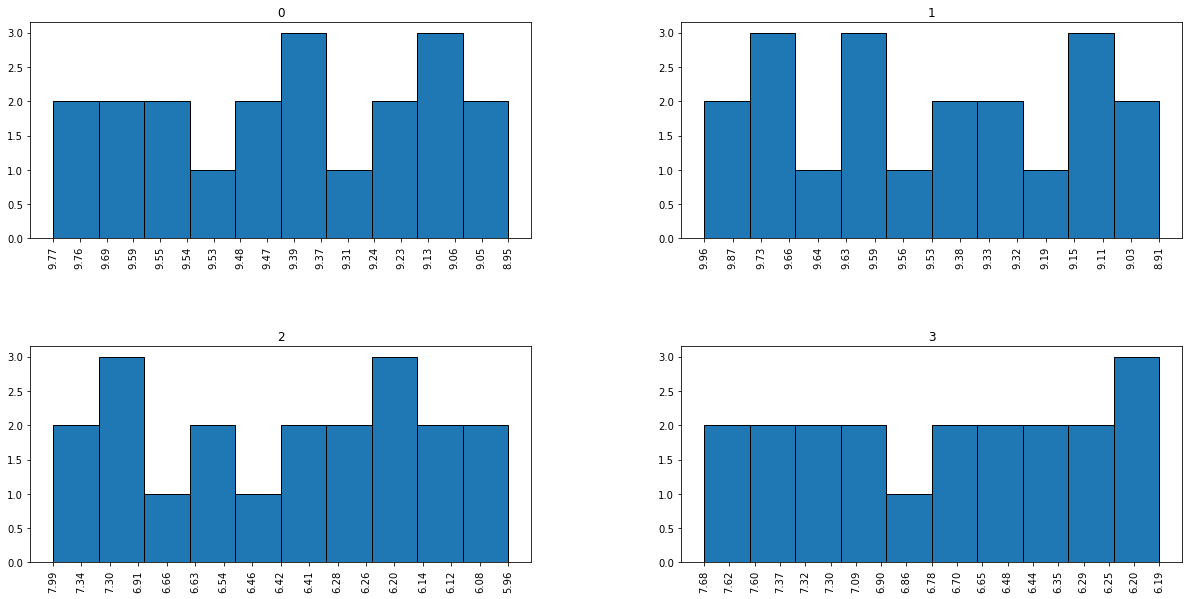

In [197]:

grouped_df['lastR'].hist(by=grouped_df['dominantCluster'], edgecolor='black', figsize = (20,10))

In [ ]:
# creating a histogram
#plt.hist(grouped_df['lastR'])
#plt.show()

# TERMS_REL_WEIGHTS_IDF

In [13]:
topics_count = 4
# Note: num_topics attempted: 20, 15, 10, 5, 6, ,7 , 8, 4

In [102]:
## use cached pickle file is available 

if path.exists(TERMS_REL_WEIGHTS_IDF):
    terms_topics_df = pd.read_csv(TERMS_REL_WEIGHTS_IDF)
    weighted_topics_columns = genWeightedTopicsColumns(topics_count)
    print('loaded terms_topics_df [{0}] from cache'.format(TERMS_REL_WEIGHTS_IDF))
    print('topic column names: {}'.format(weighted_topics_columns))
else:
    print("computing compute_terms_topics_associations from scratch...")
    #terms_topics_df, weighted_topics_columns, term_occur = compute_terms_topics_associations(lda_model, topics_count, list_of_ltcs.columns, bows)
    print("done")
    #terms_topics_df.to_csv(TERMS_REL_WEIGHTS_IDF)
    print("terms_topics_df saved to: {0}".format(TERMS_REL_WEIGHTS_IDF))


loaded terms_topics_df [C:/Users/c2057924/Newcastle University/data//terms_rel_weights_idf.csv] from cache
topic column names: ['weighted_topics_0', 'weighted_topics_1', 'weighted_topics_2', 'weighted_topics_3']


In [103]:
terms_topics_df_10 = terms_topics_df[['MLTC', 'weighted_topics_0', 'weighted_topics_1', 'weighted_topics_2', 'weighted_topics_3']].head(10)
terms_topics_df_10

,MLTC,weighted_topics_0,weighted_topics_1,weighted_topics_2,weighted_topics_3
0,ADHD,0.002105,0.004432,0.007511,0.985952
1,BAD,0.000163,0.000315,0.000656,0.998865
2,BPH,0.000068,0.999202,0.000190,0.000540
3,CCD,0.000548,0.994170,0.001565,0.003717
4,CHD,0.000037,0.685932,0.000105,0.313926
5,CKD,0.095250,0.471613,0.000189,0.432948
6,COPD,0.228294,0.680885,0.000588,0.090233
7,ESRD,0.000677,0.529681,0.001917,0.467725
8,GCA,0.493338,0.432271,0.038543,0.035847
9,GN,0.182434,0.800566,0.005672,0.011327


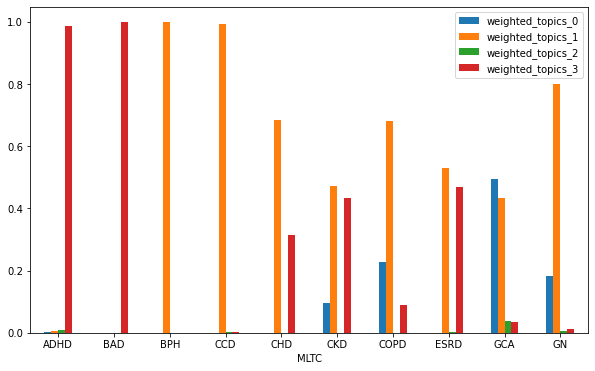

In [118]:
ax = terms_topics_df_10[['MLTC', 'weighted_topics_0', 'weighted_topics_1', 'weighted_topics_2', 'weighted_topics_3']].plot.bar(x='MLTC', figsize = (10,6), rot=0)

In [123]:
terms_topics_df


,Unnamed: 0,MLTC,topics_0,topics_1,topics_2,topics_3,idf,sums,weighted_topics_0,weighted_topics_1,weighted_topics_2,weighted_topics_3,term_occurrences
0,0,ADHD,0.000002,0.000004,0.000008,0.000992,3.298513,0.001006,0.002105,0.004432,0.007511,0.985952,48821
1,1,BAD,0.000002,0.000004,0.000009,0.013596,2.109351,0.013611,0.000163,0.000315,0.000656,0.998865,16776
2,2,BPH,0.000002,0.035403,0.000007,0.000019,1.160299,0.035432,0.000068,0.999202,0.000190,0.000540,43201
3,3,CCD,0.000003,0.004850,0.000008,0.000018,2.002031,0.004879,0.000548,0.994170,0.001565,0.003717,9786
4,4,CHD,0.000003,0.051889,0.000008,0.023748,0.950506,0.075648,0.000037,0.685932,0.000105,0.313926,11218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,198,varices_portal_hypert,0.000002,0.000004,0.000006,0.004064,2.614267,0.004077,0.000552,0.001091,0.001541,0.996816,71
199,199,venous_lymphatic,0.025347,0.010391,0.002138,0.000036,0.905719,0.037913,0.668554,0.274084,0.056400,0.000962,32
200,200,venous_thromb,0.004334,0.010404,0.000015,0.000054,1.427005,0.014806,0.292689,0.702677,0.000981,0.003654,24
201,201,vitb12_deficiency,0.005842,0.000070,0.000014,0.020433,1.454019,0.026358,0.221628,0.002641,0.000529,0.775201,19


# Patient Demographics

In [199]:
df_demographics = pd.read_csv(DATA_PATH+'demographics.tsv', sep='\t')
df_demographics

,patient_id,Sex,Year_of_birth,Townsend_deprivation_index_at_recruitment,Alcohol_intake_frequency,Smoking_status,Alcohol_drinker_status,Ethnic_background,Body_mass_index,Age_at_recruitment,Body_fat_percentage
0,1000014,0.0,1946.0,-3.523700,3.0,0.0,2.0,1001.0,23.9069,61.0,41.1
1,1000023,1.0,1949.0,-0.480886,3.0,1.0,2.0,1001.0,32.8490,60.0,27.7
2,1000030,0.0,1950.0,1.011780,6.0,1.0,1.0,1001.0,23.1718,57.0,34.2
3,1000041,1.0,1942.0,4.024420,3.0,2.0,2.0,1002.0,22.7528,65.0,18.6
4,1000059,1.0,1942.0,-3.139490,3.0,0.0,2.0,1001.0,28.3737,66.0,19.2
...,...,...,...,...,...,...,...,...,...,...,...
502362,6024824,1.0,1959.0,-3.426150,3.0,0.0,2.0,1001.0,33.3056,48.0,31.9
502363,6024838,1.0,1963.0,6.896470,3.0,0.0,2.0,1001.0,28.1847,45.0,25.8
502364,6024846,0.0,1963.0,-2.229700,3.0,2.0,2.0,1001.0,26.2536,44.0,36.4
502365,6024852,0.0,1943.0,-3.603640,5.0,0.0,2.0,1001.0,26.2738,66.0,38.8


In [200]:
df_stability_demographics = pd.merge(df_stability, df_demographics, left_on='patientID', right_on='patient_id')
#df_stability_demographics = df_stability_demographics.head(10)
df_stability_demographics['Smoking_status'] = np.where(df_stability_demographics['Smoking_status']==0.0, 'Never',
                                            np.where(df_stability_demographics['Smoking_status']==1.0, 'Previous',
                                            np.where(df_stability_demographics['Smoking_status']==2.0, 'Current',
                                            np.where(df_stability_demographics['Smoking_status']==-3.0, 'Unknown','Unknown'))))

df_stability_demographics

,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector,patient_id,Sex,Year_of_birth,Townsend_deprivation_index_at_recruitment,Alcohol_intake_frequency,Smoking_status,Alcohol_drinker_status,Ethnic_background,Body_mass_index,Age_at_recruitment,Body_fat_percentage
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]",1000059,1.0,1942.0,-3.139490,3.0,Never,2.0,1001.0,28.3737,66.0,19.2
1,1000062,"[spondylosis, obesity, urine_incont, female_ge...",True,0.26,3,1.19,-116.88,"[1.16, 1.54, 1.70, 2.60]",1000062,0.0,1942.0,0.907797,3.0,Never,2.0,1001.0,34.2798,65.0,44.5
2,1000077,"[cystic_renal, hypertension, enthesopathy, all...",True,0.43,1,6.92,62.76,"[3.95, 8.21, 0.79, 2.05]",1000077,1.0,1942.0,-3.759900,3.0,Previous,2.0,1001.0,26.5011,65.0,14.9
3,1000124,"[menorrhagia, intervert_disc, depression, hype...",False,0.06,NaN,0.84,73.63,"[2.72, 1.81, 2.48, 1.00]",1000124,0.0,1945.0,-2.744220,3.0,Never,2.0,1001.0,31.4349,63.0,41.7
4,1000146,"[OA, enthesopathy, CCD, pri_skin]",True,0.66,1,2.31,73.15,"[1.09, 2.35, 0.42, 0.15]",1000146,0.0,1943.0,-3.681360,1.0,Never,2.0,1001.0,18.4661,65.0,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167806,6024736,"[irritable_bowel_syndrome, anxiety_phobia, dep...",False,-0.08,NaN,0.80,105.40,"[4.33, 0.95, 4.54, 0.18]",6024736,0.0,1946.0,3.328880,1.0,Previous,2.0,1001.0,21.8464,61.0,34.2
167807,6024745,"[anxiety_phobia, depression, dementia, cerebro...",True,0.29,1,1.53,126.94,"[0.44, 1.71, 1.36, 0.49]",6024745,0.0,1943.0,0.123373,4.0,Current,2.0,1001.0,27.8125,64.0,41.8
167808,6024791,"[CCD, iron_deficiency_anaemia, oth_anaemia, vi...",True,0.33,0,2.66,6.19,"[2.65, 1.82, 0.01, 1.53]",6024791,1.0,1940.0,-3.358440,1.0,Previous,2.0,1001.0,35.4748,69.0,28.8
167809,6024800,"[anxiety_phobia, allergic_rhinitis, obesity, G...",True,0.15,2,1.48,-146.08,"[1.95, 0.52, 3.19, 1.34]",6024800,0.0,1965.0,-4.316920,1.0,Previous,2.0,1001.0,33.5430,42.0,43.2


In [201]:
df_stability_demographics_grp = df_stability_demographics.groupby('dominantCluster').head(15)
df_stability_demographics_grp


,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector,patient_id,Sex,Year_of_birth,Townsend_deprivation_index_at_recruitment,Alcohol_intake_frequency,Smoking_status,Alcohol_drinker_status,Ethnic_background,Body_mass_index,Age_at_recruitment,Body_fat_percentage
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]",1000059,1.0,1942.0,-3.139490,3.0,Never,2.0,1001.0,28.3737,66.0,19.2
1,1000062,"[spondylosis, obesity, urine_incont, female_ge...",True,0.26,3,1.19,-116.88,"[1.16, 1.54, 1.70, 2.60]",1000062,0.0,1942.0,0.907797,3.0,Never,2.0,1001.0,34.2798,65.0,44.5
2,1000077,"[cystic_renal, hypertension, enthesopathy, all...",True,0.43,1,6.92,62.76,"[3.95, 8.21, 0.79, 2.05]",1000077,1.0,1942.0,-3.759900,3.0,Previous,2.0,1001.0,26.5011,65.0,14.9
3,1000124,"[menorrhagia, intervert_disc, depression, hype...",False,0.06,NaN,0.84,73.63,"[2.72, 1.81, 2.48, 1.00]",1000124,0.0,1945.0,-2.744220,3.0,Never,2.0,1001.0,31.4349,63.0,41.7
4,1000146,"[OA, enthesopathy, CCD, pri_skin]",True,0.66,1,2.31,73.15,"[1.09, 2.35, 0.42, 0.15]",1000146,0.0,1943.0,-3.681360,1.0,Never,2.0,1001.0,18.4661,65.0,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1004520,"[tinnitus, CHD, periph_neuro, CKD, enthesopath...",True,0.17,3,1.83,-82.53,"[1.08, 3.63, 0.84, 5.44]",1004520,1.0,1956.0,5.414130,4.0,Previous,2.0,1001.0,27.5011,52.0,26.1
150,1004644,"[schizophrenia, obesity, cin_cervical]",True,0.23,3,1.45,-99.33,"[0.51, 0.15, 0.75, 1.59]",1004644,0.0,1963.0,5.946610,2.0,Current,2.0,1001.0,30.8845,45.0,39.7
163,1005025,"[schizophrenia, depression, PD, BAD, hypertens...",True,0.37,3,3.74,-89.43,"[1.66, 1.49, 1.62, 5.23]",1005025,1.0,1943.0,3.419120,6.0,Previous,1.0,1001.0,34.7209,65.0,NaN
191,1005755,"[sinusitis, type_2_diabetes, diab_eye, unspeci...",True,0.80,3,3.09,-76.44,"[0.86, 0.00, 0.14, 3.00]",1005755,0.0,1945.0,3.442260,4.0,Current,2.0,1003.0,23.3885,63.0,34.0


In [211]:
df_stability_stable_demographics = pd.merge(df_stability_stable, df_demographics, left_on='patientID', right_on='patient_id')
#df_stability_stable_demographics = df_stability_stable_demographics.head(10)
df_stability_stable_demographics

,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector,patient_id,Sex,Year_of_birth,Townsend_deprivation_index_at_recruitment,Alcohol_intake_frequency,Smoking_status,Alcohol_drinker_status,Ethnic_background,Body_mass_index,Age_at_recruitment,Body_fat_percentage
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]",1000059,1.0,1942.0,-3.139490,3.0,0.0,2.0,1001.0,28.3737,66.0,19.2
1,1000062,"[spondylosis, obesity, urine_incont, female_ge...",True,0.26,3,1.19,-116.88,"[1.16, 1.54, 1.70, 2.60]",1000062,0.0,1942.0,0.907797,3.0,0.0,2.0,1001.0,34.2798,65.0,44.5
2,1000077,"[cystic_renal, hypertension, enthesopathy, all...",True,0.43,1,6.92,62.76,"[3.95, 8.21, 0.79, 2.05]",1000077,1.0,1942.0,-3.759900,3.0,1.0,2.0,1001.0,26.5011,65.0,14.9
3,1000146,"[OA, enthesopathy, CCD, pri_skin]",True,0.66,1,2.31,73.15,"[1.09, 2.35, 0.42, 0.15]",1000146,0.0,1943.0,-3.681360,1.0,0.0,2.0,1001.0,18.4661,65.0,28.4
4,1000169,"[allergic_rhinitis, hypertension, enthesopathy...",True,0.31,0,2.00,-3.26,"[2.26, 0.68, 0.26, 0.80]",1000169,0.0,1943.0,1.582230,4.0,0.0,2.0,1001.0,25.6607,66.0,38.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129420,6024693,"[allergic_rhinitis, sinusitis, enthesopathy, s...",True,0.31,0,4.43,22.30,"[6.68, 2.71, 2.58, 1.03]",6024693,1.0,1954.0,-4.137370,4.0,0.0,2.0,1001.0,29.5679,56.0,26.6
129421,6024745,"[anxiety_phobia, depression, dementia, cerebro...",True,0.29,1,1.53,126.94,"[0.44, 1.71, 1.36, 0.49]",6024745,0.0,1943.0,0.123373,4.0,2.0,2.0,1001.0,27.8125,64.0,41.8
129422,6024791,"[CCD, iron_deficiency_anaemia, oth_anaemia, vi...",True,0.33,0,2.66,6.19,"[2.65, 1.82, 0.01, 1.53]",6024791,1.0,1940.0,-3.358440,1.0,1.0,2.0,1001.0,35.4748,69.0,28.8
129423,6024800,"[anxiety_phobia, allergic_rhinitis, obesity, G...",True,0.15,2,1.48,-146.08,"[1.95, 0.52, 3.19, 1.34]",6024800,0.0,1965.0,-4.316920,1.0,1.0,2.0,1001.0,33.5430,42.0,43.2


In [212]:
df_stability_stable_demographics['Smoking_status'] = np.where(df_stability_stable_demographics['Smoking_status']==0.0, 'Never',
                                            np.where(df_stability_stable_demographics['Smoking_status']==1.0, 'Previous',
                                            np.where(df_stability_stable_demographics['Smoking_status']==2.0, 'Current',
                                            np.where(df_stability_stable_demographics['Smoking_status']==-3.0, 'Unknown','Unknown'))))

df_stability_stable_demographics['Alcohol_drinker_status'] = np.where(df_stability_stable_demographics['Alcohol_drinker_status']==0.0, 'Never',
                                            np.where(df_stability_stable_demographics['Alcohol_drinker_status']==1.0, 'Previous',
                                            np.where(df_stability_stable_demographics['Alcohol_drinker_status']==2.0, 'Current',
                                            np.where(df_stability_stable_demographics['Alcohol_drinker_status']==-3.0, 'Unknown','Unknown'))))

df_stability_stable_demographics

,patientID,conditions,stable,trend,dominantCluster,lastR,lastTheta,lastVector,patient_id,Sex,Year_of_birth,Townsend_deprivation_index_at_recruitment,Alcohol_intake_frequency,Smoking_status,Alcohol_drinker_status,Ethnic_background,Body_mass_index,Age_at_recruitment,Body_fat_percentage
0,1000059,"[OA, skin_ulcer, dermatitis, erectile_dysfunct...",True,0.55,0,2.69,21.01,"[2.66, 1.57, 0.15, 0.61]",1000059,1.0,1942.0,-3.139490,3.0,Never,Current,1001.0,28.3737,66.0,19.2
1,1000062,"[spondylosis, obesity, urine_incont, female_ge...",True,0.26,3,1.19,-116.88,"[1.16, 1.54, 1.70, 2.60]",1000062,0.0,1942.0,0.907797,3.0,Never,Current,1001.0,34.2798,65.0,44.5
2,1000077,"[cystic_renal, hypertension, enthesopathy, all...",True,0.43,1,6.92,62.76,"[3.95, 8.21, 0.79, 2.05]",1000077,1.0,1942.0,-3.759900,3.0,Previous,Current,1001.0,26.5011,65.0,14.9
3,1000146,"[OA, enthesopathy, CCD, pri_skin]",True,0.66,1,2.31,73.15,"[1.09, 2.35, 0.42, 0.15]",1000146,0.0,1943.0,-3.681360,1.0,Never,Current,1001.0,18.4661,65.0,28.4
4,1000169,"[allergic_rhinitis, hypertension, enthesopathy...",True,0.31,0,2.00,-3.26,"[2.26, 0.68, 0.26, 0.80]",1000169,0.0,1943.0,1.582230,4.0,Never,Current,1001.0,25.6607,66.0,38.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129420,6024693,"[allergic_rhinitis, sinusitis, enthesopathy, s...",True,0.31,0,4.43,22.30,"[6.68, 2.71, 2.58, 1.03]",6024693,1.0,1954.0,-4.137370,4.0,Never,Current,1001.0,29.5679,56.0,26.6
129421,6024745,"[anxiety_phobia, depression, dementia, cerebro...",True,0.29,1,1.53,126.94,"[0.44, 1.71, 1.36, 0.49]",6024745,0.0,1943.0,0.123373,4.0,Current,Current,1001.0,27.8125,64.0,41.8
129422,6024791,"[CCD, iron_deficiency_anaemia, oth_anaemia, vi...",True,0.33,0,2.66,6.19,"[2.65, 1.82, 0.01, 1.53]",6024791,1.0,1940.0,-3.358440,1.0,Previous,Current,1001.0,35.4748,69.0,28.8
129423,6024800,"[anxiety_phobia, allergic_rhinitis, obesity, G...",True,0.15,2,1.48,-146.08,"[1.95, 0.52, 3.19, 1.34]",6024800,0.0,1965.0,-4.316920,1.0,Previous,Current,1001.0,33.5430,42.0,43.2


In [204]:
df_stability_demographics_count = df_stability_demographics.groupby('stable')['patientID'].count()
df_stability_demographics_count

stable
False     38386
True     129425
Name: patientID, dtype: int64

In [205]:
df_stability_stable_demographics_count = df_stability_stable_demographics.groupby('dominantCluster')['patientID'].count()
df_stability_stable_demographics_count

dominantCluster
0    68563
1    34351
2    18216
3     8295
Name: patientID, dtype: int64

In [206]:
df_stability_stable_demographics_ss = df_stability_stable_demographics.groupby('Smoking_status')['Body_fat_percentage'].mean()
df_stability_stable_demographics_ss


Smoking_status
Current     30.333944
Never       32.271040
Previous    31.953098
Unknown     33.074351
Name: Body_fat_percentage, dtype: float64

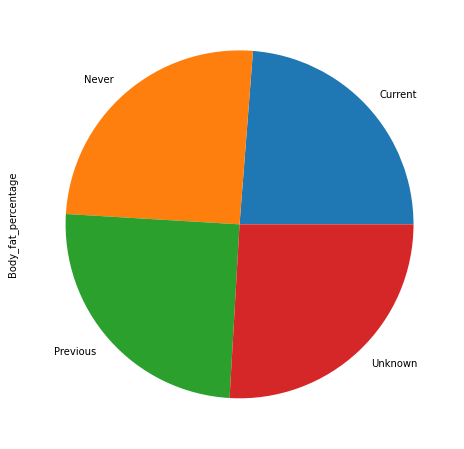

In [208]:
ax = df_stability_stable_demographics_ss.plot.pie(y='Body_fat_percentage', figsize = (10,8), rot=0)

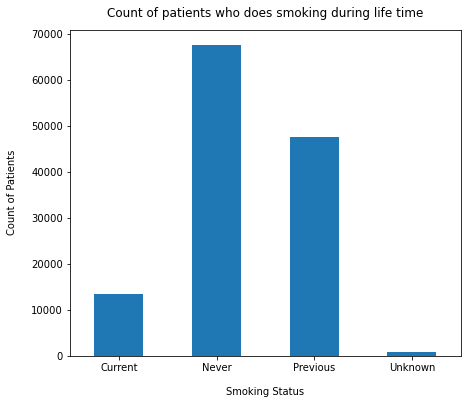

In [213]:
df_stability_stable_demographics_ss = df_stability_stable_demographics.groupby('Smoking_status')['patientID'].count().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Smoking Status", labelpad=14)
plt.ylabel("Count of Patients", labelpad=14)
plt.title("Count of patients who does smoking during life time", y=1.02);

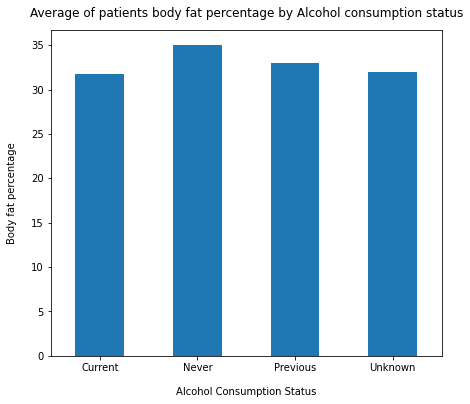

In [222]:
df_stability_stable_demographics_ss = df_stability_stable_demographics.groupby('Alcohol_drinker_status')['Body_fat_percentage'].mean().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Alcohol Consumption Status", labelpad=14)
plt.ylabel("Body fat percentage", labelpad=14)
plt.title("Average of patients body fat percentage by Alcohol consumption status", y=1.02);

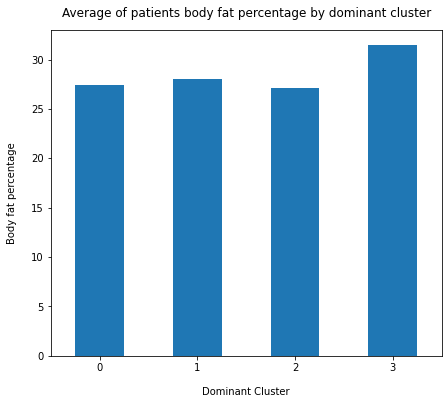

In [224]:
df_stability_stable_demographics_ss = df_stability_stable_demographics.groupby('dominantCluster')['Body_mass_index'].mean().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Dominant Cluster", labelpad=14)
plt.ylabel("Body fat percentage", labelpad=14)
plt.title("Average of patients body fat percentage by dominant cluster", y=1.02);

In [ ]:
for stable individuals, calculate the number of stages requires to reach stability - 
for all individuals, learn 